# Importing Data

In [ ]:
import zipfile
import os
import shutil

# Chemin du fichier ZIP principal
zip_file_path = '/content/Diagnosis of Diabetic Retinopathy.v3i.folder.zip'
extract_path = 'retinopathy_extracted'

# Fonction pour extraire les fichiers ZIP
def extract_zip(zip_path, extract_path):
    if os.path.exists(extract_path):
        shutil.rmtree(extract_path)
    os.makedirs(extract_path)
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extraction de {zip_path} terminée.")
    except zipfile.BadZipFile:
        print(f"Erreur : {zip_path} n'est pas un fichier ZIP valide.")
    except FileNotFoundError:
        print(f"Erreur : {zip_path} n'a pas été trouvé.")
    except Exception as e:
        print(f"Erreur lors de l'extraction de {zip_path} : {e}")

# Extraire le fichier ZIP principal
extract_zip(zip_file_path, extract_path)

print("Extraction terminée.")


Extraction de /content/Diagnosis of Diabetic Retinopathy.v3i.folder.zip terminée.
Extraction terminée.


Sous-dossier: No_DR, Nombre d'images: 1026
Sous-dossier: Severe, Nombre d'images: 104
Sous-dossier: Proliferate_DR, Nombre d'images: 166
Sous-dossier: Mild, Nombre d'images: 217
Sous-dossier: Moderate, Nombre d'images: 563


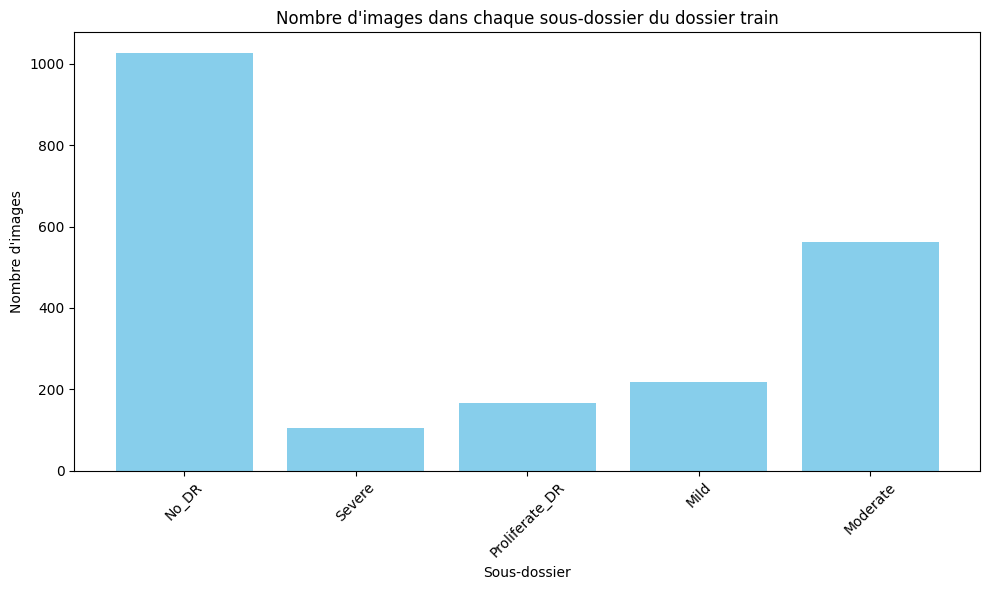

In [ ]:
import os
import matplotlib.pyplot as plt

# Chemin vers le dossier train
train_path = os.path.join(extract_path, 'train')

# Vérifier si le dossier train existe
if not os.path.exists(train_path):
    print(f"Le dossier {train_path} n'existe pas.")
else:
    # Dictionnaire pour stocker le nombre d'images dans chaque sous-dossier
    image_counts = {}

    # Parcourir chaque sous-dossier dans le dossier train
    for root, dirs, files in os.walk(train_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            image_files = [f for f in os.listdir(dir_path) if f.endswith(('.jpeg', '.jpg', '.png'))]
            image_counts[dir_name] = len(image_files)

    # Afficher le nombre d'images dans chaque sous-dossier
    for dir_name, count in image_counts.items():
        print(f"Sous-dossier: {dir_name}, Nombre d'images: {count}")

    # Visualisation des résultats sous forme de diagramme à barres
    plt.figure(figsize=(10, 6))
    plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
    plt.xlabel('Sous-dossier')
    plt.ylabel('Nombre d\'images')
    plt.title('Nombre d\'images dans chaque sous-dossier du dossier train')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Organizing training images...
Catégorie: No_DR, Nombre d'images: 1026
Catégorie: DR, Nombre d'images: 1050
Organizing test images...
Catégorie: No_DR, Nombre d'images: 118
Catégorie: DR, Nombre d'images: 113
Organizing validation images...
Catégorie: No_DR, Nombre d'images: 286
Catégorie: DR, Nombre d'images: 245


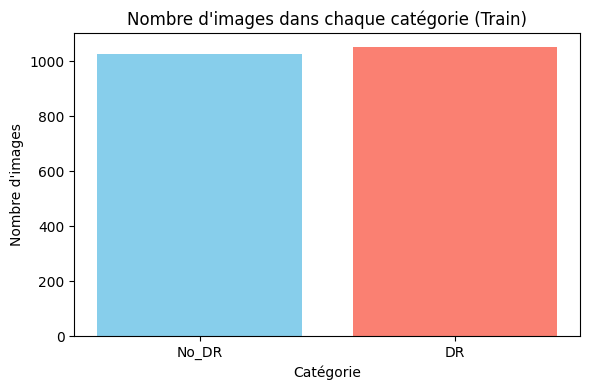

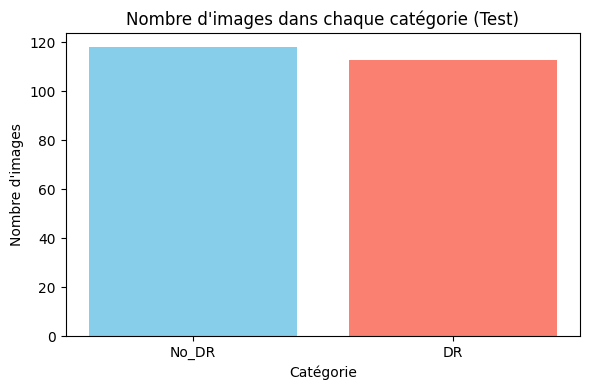

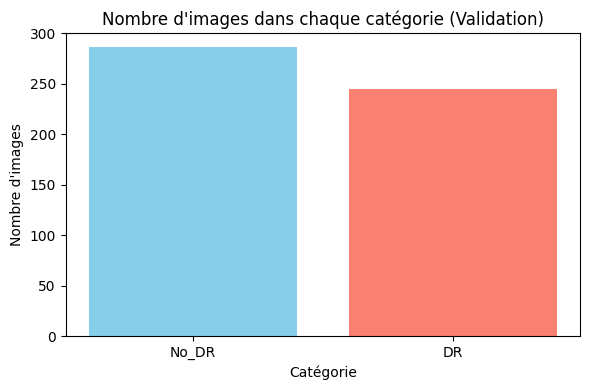

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt

# Fonction pour organiser les images en sous-dossiers 'DR' et 'No_DR'
def organize_images(src_folder):
    dr_path = os.path.join(src_folder, 'DR')
    no_dr_path = os.path.join(src_folder, 'No_DR')

    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)

    # Parcourir les sous-dossiers dans le dossier source
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            if dir_name != 'No_DR' and dir_name != 'DR':
                for file_name in os.listdir(dir_path):
                    if file_name.endswith(('.jpeg', '.jpg', '.png')):
                        file_path = os.path.join(dir_path, file_name)
                        # Déplacer les fichiers dans le dossier approprié
                        if 'no_dr' in dir_name.lower():
                            shutil.move(file_path, no_dr_path)
                        else:
                            shutil.move(file_path, dr_path)
                # Supprimer le sous-dossier après avoir déplacé les fichiers
                shutil.rmtree(dir_path)

    # Compter le nombre d'images dans 'No_DR' et 'DR'
    image_counts = {'No_DR': 0, 'DR': 0}

    # Compter les images dans le dossier 'No_DR'
    if os.path.exists(no_dr_path):
        image_counts['No_DR'] = len([f for f in os.listdir(no_dr_path) if f.endswith(('.jpeg', '.jpg', '.png'))])

    # Compter les images dans le dossier 'DR'
    if os.path.exists(dr_path):
        image_counts['DR'] = len([f for f in os.listdir(dr_path) if f.endswith(('.jpeg', '.jpg', '.png'))])

    # Afficher le nombre d'images dans chaque catégorie
    for category, count in image_counts.items():
        print(f"Catégorie: {category}, Nombre d'images: {count}")

    return image_counts

# Chemin des dossiers d'extraction
extract_path = 'retinopathy_extracted'

# Organiser les images dans les dossiers 'train', 'test' et 'valid'
train_path = os.path.join(extract_path, 'train')
test_path = os.path.join(extract_path, 'test')
validation_path = os.path.join(extract_path, 'valid')

print("Organizing training images...")
train_counts = organize_images(train_path)

print("Organizing test images...")
test_counts = organize_images(test_path)

print("Organizing validation images...")
validation_counts = organize_images(validation_path)

# Visualisation des résultats sous forme de diagramme à barres pour chaque dossier
def plot_image_counts(counts, title):
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon'])
    plt.xlabel('Catégorie')
    plt.ylabel("Nombre d'images")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_image_counts(train_counts, 'Nombre d\'images dans chaque catégorie (Train)')
plot_image_counts(test_counts, 'Nombre d\'images dans chaque catégorie (Test)')
plot_image_counts(validation_counts, 'Nombre d\'images dans chaque catégorie (Validation)')


# Preprocessing

In [ ]:
#juste pour la suppression des dossiers remplies
import shutil
import os

# Chemin du dossier à supprimer
folder_path = ''

# Vérifier si le dossier existe
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Le dossier {folder_path} a été supprimé.")
else:
    print(f"Le dossier {folder_path} n'existe pas.")


Le dossier  n'existe pas.


In [ ]:
!pip install pillow


In [ ]:
import os
from PIL import Image

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_extracted/train',
    'valid': 'retinopathy_extracted/valid',
    'test': 'retinopathy_extracted/test'
}
dest_folders = {
    'train': 'retinopathy_resized/train',
    'valid': 'retinopathy_resized/valid',
    'test': 'retinopathy_resized/test'
}

# Taille des images redimensionnées
new_size = (256, 256)  # Exemple : 256x256 pixels

# Fonction pour redimensionner et sauvegarder les images
def resize_images(src_folder, dst_folder, size):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)

    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')

    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    img_resized = img.resize(size, Image.ANTIALIAS)

                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)

                    img_resized.save(new_file_path)
                    print(f"Image {file} redimensionnée et sauvegardée dans {new_file_path}")

# Redimensionner les images pour les dossiers train, valid, test
for key in source_folders:
    print(f"Redimensionnement des images dans le dossier {key}...")
    resize_images(source_folders[key], dest_folders[key], new_size)


Redimensionnement des images dans le dossier train...
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg
Image dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg
Image 5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg
Image e5197

<ipython-input-7-aaf4da2c5ab0>:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(size, Image.ANTIALIAS)


Image 9232dc06cfdc_png.rf.bdd8bc77f896a85412634eb25476b33c.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/9232dc06cfdc_png.rf.bdd8bc77f896a85412634eb25476b33c.jpg
Image e82232a3c28b_png.rf.c993c5434b9ffbb40cecf1c3d442d274.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/e82232a3c28b_png.rf.c993c5434b9ffbb40cecf1c3d442d274.jpg
Image 61da799bf0aa_png.rf.bbe4745981143bb931127c261eff8e64.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/61da799bf0aa_png.rf.bbe4745981143bb931127c261eff8e64.jpg
Image 3f6c627e2ff2_png.rf.e6dc00c569c13d0cdfa96b9885494a22.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/3f6c627e2ff2_png.rf.e6dc00c569c13d0cdfa96b9885494a22.jpg
Image b532dedd928c_png.rf.c3d16379537429196ad017319f031c57.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/b532dedd928c_png.rf.c3d16379537429196ad017319f031c57.jpg
Image 76b950c6ed5e_png.rf.2044b8ba57c5fcf3159a7197b884455c.jpg re

In [ ]:
import os
import numpy as np
from PIL import Image

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_resized/train',
    'valid': 'retinopathy_resized/valid',
    'test': 'retinopathy_resized/test'
}
dest_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}

# Fonction pour normaliser et sauvegarder les images
def normalize_images(src_folder, dst_folder):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)

    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')

    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    img_array = np.array(img).astype(np.float32)

                    # Normalisation : soustraction de la moyenne et division par l'écart type
                    normalized_img = (img_array - np.mean(img_array)) / np.std(img_array)

                    # Mise à l'échelle des valeurs des pixels entre 0 et 255
                    normalized_img = (normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min()) * 255

                    # Conversion des valeurs des pixels en type entier 8 bits
                    normalized_img = normalized_img.astype(np.uint8)

                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)

                    # Enregistrer l'image normalisée
                    normalized_img_pil = Image.fromarray(normalized_img)
                    normalized_img_pil.save(new_file_path)
                    print(f"Image {file} normalisée et sauvegardée dans {new_file_path}")

# Normaliser les images pour les dossiers train, valid, test
for key in source_folders:
    print(f"Normalisation des images dans le dossier {key}...")
    normalize_images(source_folders[key], dest_folders[key])


Normalisation des images dans le dossier train...
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg
Image dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg
Image 5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg
Image e5197d77ec68_p

adjust the contrast

In [ ]:
import os
import csv
from PIL import Image, ImageEnhance, ExifTags

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
    }

dest_folders = {
    'train': 'retinopathy_contrast_enhanced/train',
    'valid': 'retinopathy_contrast_enhanced/valid',
    'test': 'retinopathy_contrast_enhanced/test'
    }

csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
    }

# Facteur d'amélioration du contraste (exemple : 1.5 pour une légère amélioration)
contrast_factor = 1.5

# Fonction pour ajuster l'orientation des images selon leurs métadonnées EXIF
def adjust_image_orientation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            orientation_value = exif.get(orientation)
            if orientation_value == 3:
                image = image.rotate(180, expand=True)
            elif orientation_value == 6:
                image = image.rotate(270, expand=True)
            elif orientation_value == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # Cas où l'image n'a pas de métadonnées EXIF
        pass
    return image

# Fonction pour améliorer le contraste des images, ajuster leur orientation et les sauvegarder
def enhance_contrast_images(src_folder, dst_folder, contrast_factor):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)

    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')

    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)

                    # Ajuster l'orientation de l'image
                    img = adjust_image_orientation(img)

                    # Appliquer l'amélioration du contraste
                    enhancer = ImageEnhance.Contrast(img)
                    enhanced_img = enhancer.enhance(contrast_factor)

                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)

                    # Enregistrer l'image avec contraste amélioré
                    enhanced_img.save(new_file_path)
                    print(f"Image {file} avec contraste amélioré et sauvegardée dans {new_file_path}")

# Fonction pour écrire un fichier CSV avec les noms d'images et leurs étiquettes
def write_image_labels_to_csv(folder, csv_path):
    image_info = []

    for root, dirs, files in os.walk(folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            label = dir_name  # Label is the directory name (DR ou No_DR)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    image_info.append([file, label])

    # Écrire les informations des images dans un fichier CSV
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Label'])
        writer.writerows(image_info)

    print(f"Fichier CSV généré : {csv_path}")

# Améliorer le contraste des images et générer les fichiers CSV pour train, valid et test
for dataset in ['train', 'valid', 'test']:
    print(f"Traitement des images pour le dataset {dataset}...")
    enhance_contrast_images(source_folders[dataset], dest_folders[dataset], contrast_factor)
    write_image_labels_to_csv(dest_folders[dataset], csv_file_paths[dataset])


Traitement des images pour le dataset train...
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg avec contraste amélioré et sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg avec contraste amélioré et sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg avec contraste amélioré et sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg
Image dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg avec contraste amélioré et sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg
Image 5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg avec contraste amélioré et sauvegardée dans retinopathy_contrast_e

# The model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch torchvision torchaudio

Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
Found existing installation: torchvision 0.18.0+cu121
Uninstalling torchvision-0.18.0+cu121:
  Successfully uninstalled torchvision-0.18.0+cu121
Found existing installation: torchaudio 2.3.0+cu121
Uninstalling torchaudio-2.3.0+cu121:
  Successfully uninstalled torchaudio-2.3.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 973.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 100.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

# Définir les transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Créer les datasets
train_dataset = datasets.ImageFolder(root='retinopathy_contrast_enhanced/train', transform=transform)
val_dataset = datasets.ImageFolder(root='retinopathy_contrast_enhanced/valid', transform=transform)
test_dataset = datasets.ImageFolder(root='retinopathy_contrast_enhanced/test', transform=transform)

# Créer les dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Verify dataset
print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 2076
Validation dataset size: 531
Test dataset size: 231


In [ ]:
# Define the CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Flatten layer
        self.flatten = nn.Flatten()

        # First fully connected layer
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        # Dropout layer
        self.dropout1 = nn.Dropout(p=0.5)
        # Second fully connected layer
        self.fc2 = nn.Linear(256, 128)
        # Dropout layer
        self.dropout2 = nn.Dropout(p=0.5)
        # Output layer for binary classification
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        x = self.flatten(x)  # Flatten the layer

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first FC layer
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second FC layer
        x = torch.sigmoid(self.fc3(x))  # Apply sigmoid to output layer for binary classification
        return x

# Model, Loss Function, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



Epoch 1/20, Loss: 0.38233129129959986
Validation Loss: 0.27536267831045036
Epoch 2/20, Loss: 0.2494941991682236
Validation Loss: 0.19903079464155085
Epoch 3/20, Loss: 0.21034931001754908
Validation Loss: 0.23940488301655827
Epoch 4/20, Loss: 0.20169435556118304
Validation Loss: 0.2417247970314587
Epoch 5/20, Loss: 0.19292842447757722
Validation Loss: 0.2174453573191867
Epoch 6/20, Loss: 0.17363918440846296
Validation Loss: 0.19673906485824025
Epoch 7/20, Loss: 0.17549686655402183
Validation Loss: 0.19534917526385365
Epoch 8/20, Loss: 0.16643525456579833
Validation Loss: 0.21674420290133534
Epoch 9/20, Loss: 0.14744945976596613
Validation Loss: 0.19483606451574495
Epoch 10/20, Loss: 0.14750447309074494
Validation Loss: 0.20176956364337137
Epoch 11/20, Loss: 0.15210014919822032
Validation Loss: 0.2281919687109835
Epoch 12/20, Loss: 0.13107780304092628
Validation Loss: 0.2393405424321399
Epoch 13/20, Loss: 0.1200468992957702
Validation Loss: 0.27105386116925406
Epoch 14/20, Loss: 0.105514

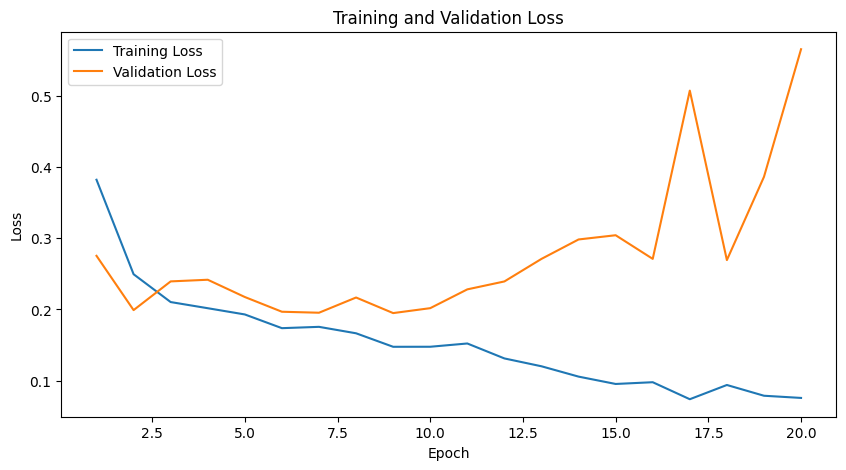

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt

# Training Loop
num_epochs = 20
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)  # Reshape labels for BCELoss

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_train_loss}')

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    print(f'Validation Loss: {avg_val_loss}')
# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Metrics with validation dataset

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import numpy as np
# Evaluation
model.eval()
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)  # Reshape labels for BCELoss
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Threshold the sigmoid output at 0.5

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print(f'Validation Recall: {recall:.4f}')
print(f'Validation F1 Score: {f1:.4f}')

Validation Accuracy: 90.58%
Validation Recall: 0.9126
Validation F1 Score: 0.9126


In [ ]:
print(train_losses)

[0.4843040329905657, 0.2599114129176507, 0.2242507710479773, 0.21056410120083735, 0.19954121748988446, 0.18167960764123844, 0.16279324645606372, 0.15443573344785433, 0.16121674231253563, 0.13771329371688457, 0.12437208764111767, 0.11160767574149828, 0.10360335713395706, 0.09874787732528953, 0.0740503316745162, 0.07729221673395771, 0.062772505171597, 0.06038706655112597, 0.044594192577418514, 0.0542635434307158]


# Test

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
# Test Loop

model.eval()
all_labels = []
all_preds = []
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:  # Assuming test_loader is defined
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        preds = outputs.round()  # Round the outputs to get binary predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print("Evaluation metrics : ")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

Evaluation metrics : 
Accuracy: 92.64%
Precision: 93.16%
Recall: 92.37%
F1 Score: 92.77%


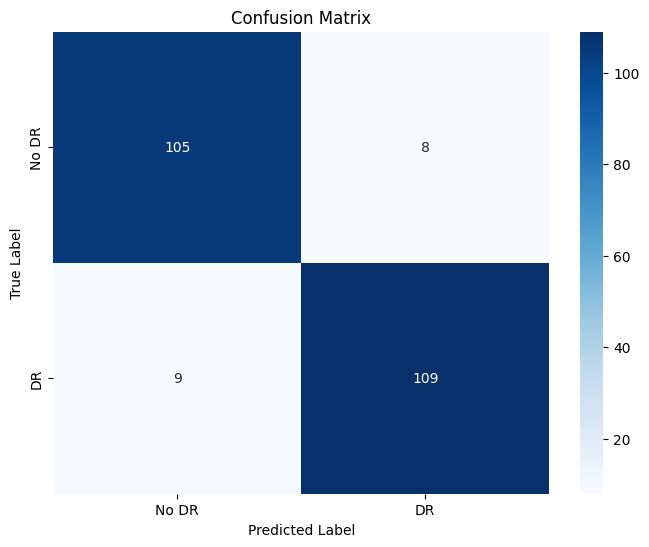

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No DR', 'DR'], yticklabels=['No DR', 'DR'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


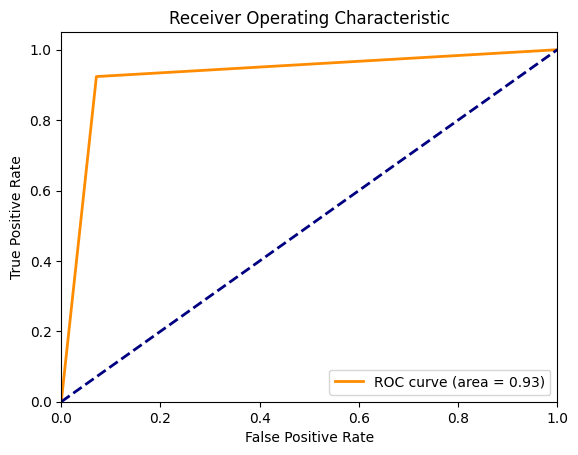

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(all_labels, [output.item() for output in all_preds])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


importing the model to deploy

In [ ]:
import torch
import pickle

# Assuming your model is named 'model' and it's already trained
# Save the entire model object
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files

files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>